In [1]:
import sys
import os

import cv2
import numpy as np
import openslide
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu
from scipy import ndimage

In [2]:
#wsi_path = "/home/data/LBP/zhongshan/9603.svs"
wsi_path = "/home/data/LBP/zhongshan/9603.svs"
#wsi_path = "/home/data/TCTDATA/stage1_labeled/01_ASCUS/2017-09-22-09_56_13.tif"
# wsi_path = "/home/data/TCTDATA/stage1_labeled/04_HSIL/2017-09-07-17_57_35.tif"

npy_path = "/home/data/LBP/zhongshan/9603_mask.npy"
level = 3

slide = openslide.OpenSlide(wsi_path)

print(slide.level_dimensions)

# # note the shape of img_RGB is the transpose of slide.level_dimensions
# img_RGB = np.transpose(np.array(slide.read_region((0, 0),
#                        level,
#                        slide.level_dimensions[level]).convert('RGB')),
#                        axes=[1, 0, 2])

# img_HSV = rgb2hsv(img_RGB)

# background_R = img_RGB[:, :, 0] > threshold_otsu(img_RGB[:, :, 0])
# background_G = img_RGB[:, :, 1] > threshold_otsu(img_RGB[:, :, 1])
# background_B = img_RGB[:, :, 2] > threshold_otsu(img_RGB[:, :, 2])
# tissue_RGB = np.logical_not(background_R & background_G & background_B)
# tissue_S = img_HSV[:, :, 1] > threshold_otsu(img_HSV[:, :, 1])
# #min_R = img_RGB[:, :, 0] > args.RGB_min
# #min_G = img_RGB[:, :, 1] > args.RGB_min
# #min_B = img_RGB[:, :, 2] > args.RGB_min

# #tissue_mask = tissue_S & tissue_RGB & min_R & min_G & min_B
# tissue_mask = tissue_S & tissue_RGB

# # np.save(npy_path, tissue_mask)

((88536, 88390), (22134, 22097), (5533, 5524), (2766, 2762))


In [8]:
slide = openslide.OpenSlide(wsi_path)

print(slide.level_dimensions)

# note the shape of img_RGB is the transpose of slide.level_dimensions
img_RGB = np.transpose(cv2.cvtColor(np.array(slide.read_region((0, 0),
                       level,
                       slide.level_dimensions[level]).convert('RGB')), cv2.COLOR_RGB2GRAY),
                       axes=[1, 0])

#img_HSV = rgb2hsv(img_RGB)

background = img_RGB > threshold_otsu(img_RGB)
# background = img_RGB > 240
#background_R = img_RGB[:, :, 0] > threshold_otsu(img_RGB[:, :, 0])
#background_G = img_RGB[:, :, 1] > threshold_otsu(img_RGB[:, :, 1])
#background_B = img_RGB[:, :, 2] > threshold_otsu(img_RGB[:, :, 2])
#tissue_RGB = np.logical_not(background_R & background_G & background_B)

#tissue_RGB = np.logical_not(background_R & background_G & background_B)
#tissue_S = img_HSV[:, :, 1] > threshold_otsu(img_HSV[:, :, 1])
#tissue_V = img_HSV[:, :, 2] > threshold_otsu(img_HSV[:, :, 2])
#min_R = img_RGB[:, :, 0] > args.RGB_min
#min_G = img_RGB[:, :, 1] > args.RGB_min
#min_B = img_RGB[:, :, 2] > args.RGB_min

#tissue_mask = tissue_S & tissue_RGB & min_R & min_G & min_B
tissue_mask = background

# np.save(npy_path, tissue_mask)

((88536, 88390), (22134, 22097), (5533, 5524), (2766, 2762))


In [4]:
threshold_otsu(img_RGB)

187

In [5]:
tissue_mask.shape

(2766, 2762)

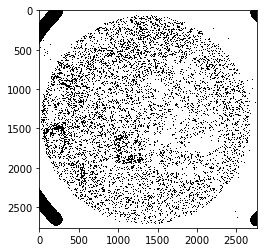

In [9]:
plt.imshow(tissue_mask.T, cmap="gray")

In [6]:
import matplotlib.pyplot as plt

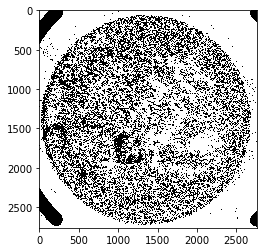

In [7]:
plt.imshow(tissue_mask.T, cmap="gray")
tissue_mask = ndimage.generic_filter(tissue_mask, np.nanmean, size=3, mode='constant', cval=np.NaN)
plt.imshow(tissue_mask.T, cmap="gray")

In [10]:
kernel_size = (5, 5)

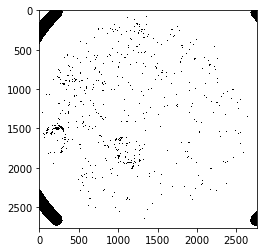

In [11]:
kernel = np.ones(kernel_size, np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation.T, cmap="gray")

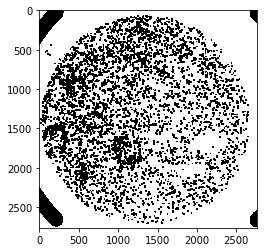

In [246]:
kernel = np.ones(kernel_size, np.uint8)
img = np.array(tissue_mask * 255, dtype=np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 5)
plt.imshow(erosion.T, cmap="gray")

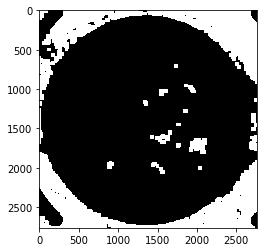

In [238]:
kernel = np.ones(kernel_size, np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 5)
plt.imshow(dilation.T, cmap="gray")

In [247]:
#dilation = np.array(255 - dilation, dtype=np.uint8)
#plt.imshow(dilation, cmap="gray")
im2, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
im2.shape
print(len(contours))
print(contours[0])

5532
[[[ 435    0]]

 [[ 434    1]]

 [[ 432    1]]

 ...

 [[2251    1]]

 [[2249    1]]

 [[2248    0]]]


In [252]:
cnt = contours[1]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = np.ones(tissue_mask.shape)
#img = np.array(tissue_mask*255, dtype=np.uint8)
print(img.shape)
cv2.circle(img,center,radius, 0, -1)
img = np.array((255 - img) / 255, dtype=np.uint8)
print("Center: {}; Radius: {}".format(center, radius))
# cv2.circle(img,center,3,(255,255,0),30)
# cv2.drawContours(img, [cnt], 0, (0,0,255), 30)

(2766, 2762)
Center: (78, 68); Radius: 103


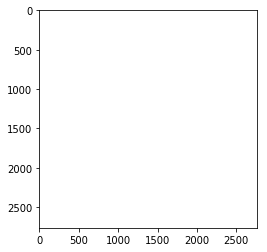

In [251]:
plt.imshow(img.T, cmap="gray")

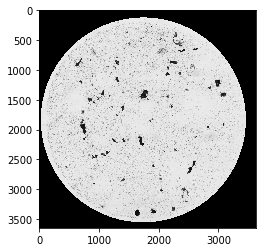

In [118]:
plt.imshow((img_RGB * img).T, cmap="gray")

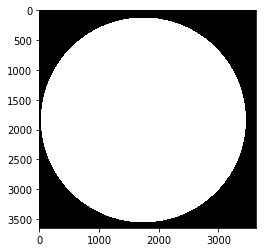

In [119]:
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(img_open.T, cmap="gray")

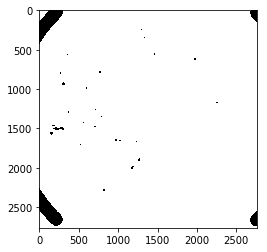

In [29]:
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_close_open = cv2.morphologyEx(img_close, cv2.MORPH_OPEN, kernel)
plt.imshow(img_close_open.T, cmap="gray")

In [20]:
print("Original ROI ratio: {}".format(np.sum(tissue_mask != 0) / (tissue_mask.shape[0]*tissue_mask.shape[1])))
print("Erosion ROI ratio: {}".format(np.sum(erosion != 0) / (tissue_mask.shape[0]*tissue_mask.shape[1])))
print("Erosion+Dilation ROI ratio: {}".format(np.sum(dilation != 0) / (tissue_mask.shape[0]*tissue_mask.shape[1])))
print("OPEN ROI ratio: {}".format(np.sum(img_open != 0) / (tissue_mask.shape[0]*tissue_mask.shape[1])))
print("CLOSE+OPEN ROI ratio: {}".format(np.sum(img_close_open != 0) / (tissue_mask.shape[0]*tissue_mask.shape[1])))

Original ROI ratio: 0.8350065683276237
Erosion ROI ratio: 0.5574004815900955
Erosion+Dilation ROI ratio: 0.7652393578170429
OPEN ROI ratio: 0.7652393578170429
CLOSE+OPEN ROI ratio: 0.9341739169589559


In [12]:
start = (5000, 5000)
patch_size = 897
scope = 32

patch = slide.read_region(start, 0, (patch_size, patch_size)).convert("RGB")

stride = int(patch_size / scope) + 1

pix_num = 0
s = int(start[0] / scope)
e = int(start[1] / scope)
print("s: {}, e: {}, stride: {}".format(s, e, stride))
for i in range(stride):
    for j in range(stride):
        if tissue_mask[s + i, e + j] == 0:
            pix_num += 1

print(pix_num /stride/stride)

s: 156, e: 156, stride: 29
0.0


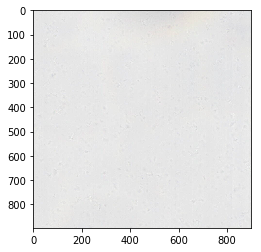

In [13]:
plt.imshow(patch)

In [14]:
pix_num

0

804609.0

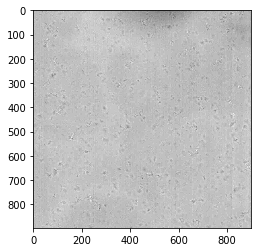

In [16]:
patch_gray = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2GRAY)
plt.imshow(patch_gray, cmap="gray")
patch_mask = patch_gray > threshold_otsu(img_RGB)
np.sum(patch_mask) / patch_mask.shape[0] * patch_mask.shape[1]

In [17]:
np.sum(patch_mask) / (patch_mask.shape[0] * patch_mask.shape[1])

1.0

In [21]:
img_RGB = np.transpose(np.array(slide.read_region((0, 0),
                       level,
                       slide.level_dimensions[level]).convert('RGB')),
                       axes=[1, 0, 2])
imgray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
thres = threshold_otsu(imgray)
ret, thresh = cv2.threshold(imgray, thres, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im2.shape
len(contours)


61967

In [22]:
thres

187

In [23]:
img = cv2.drawContours(np.array(im2), contours, -1, (0,255,0), 3)

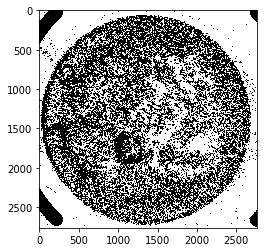

In [24]:
plt.imshow(img.T, cmap="gray")

In [25]:
np.sum(img!=0) / (img.shape[0]*img.shape[1])

0.5456044563053065

In [26]:
start = (36000, 37000)
patch_size = 897
scope = 32

patch = slide.read_region(start, 0, (patch_size, patch_size)).convert("RGB")

stride = int(patch_size / scope) + 1

pix_num = 0
s = int(start[0] / scope)
e = int(start[1] / scope)
print("s: {}, e: {}, stride: {}".format(s, e, stride))
for i in range(stride):
    for j in range(stride):
        if img[s + i, e + j] == 0:
            pix_num += 1

print(pix_num /stride/stride)

s: 1125, e: 1156, stride: 29
0.0


In [42]:
#(x,y),radius = cv2.minEnclosingCircle(contours[4])
img = np.load(npy_path)
x = img.shape[0] / 2
y = img.shape[1] / 2
radius = min(img.shape[0], img.shape[1]) / 0.45
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,0,0),-1)

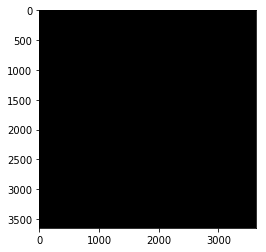

In [43]:
plt.imshow(img.T, cmap="gray")

In [27]:
np.save(npy_path, img)

In [28]:
slide.level_downsamples

(1.0,
 2.0000343745457263,
 4.000137318560835,
 8.000550389840011,
 16.00220401869959,
 32.00440803739918,
 64.04404409680069)

In [33]:
p = slide.read_region((0, 0),
                           level,
                           (3626, 3646)).convert('RGB')

In [38]:
np.array(p).shape

(3646, 3626, 3)

In [16]:
slide_name = "/home/data/TCTDATA/stage1_labeled/04_HSIL/2017-09-07-18_50_27.tif"

slide = openslide.OpenSlide(slide_name)

In [18]:
min(slide.level_dimensions[-1])

59964